In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [15]:
# Reading the dataset voice
d = pd.read_csv('voice.csv')
d

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
# Checking for null values
d.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

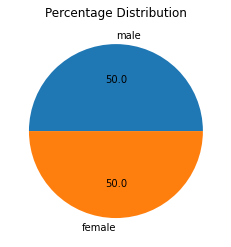

In [4]:
# Percentage distribution 
gender = ['male','female']
plt.pie(d['label'].value_counts(),labels=gender,autopct='%1.1f')
plt.title('Percentage Distribution')
plt.show()

In [5]:
x = d[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']]
y = d['label']


In [6]:
# Splitting the dataset with testing size = 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2534, 20) (634, 20) (2534,) (634,)


In [7]:
# Function for model training and testing 
def apply_model(model):
    model.fit(x_train,y_train)
    print('Accuracy \n',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Prediction \n',ypred)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    print('Confusion matrix \n',cm)
    print('Classification report\n',cr)



In [8]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
apply_model(dtc)

Accuracy 
 0.9637223974763407
Prediction 
 ['female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 

In [9]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(rfc)

Accuracy 
 0.9779179810725552
Prediction 
 ['female' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'female' 'female

In [10]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=19)
apply_model(knn)


Accuracy 
 0.7066246056782335
Prediction 
 ['female' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'fe

In [11]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
apply_model(lr)


Accuracy 
 0.8911671924290221
Prediction 
 ['female' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'female' 'male' 'male'

In [12]:
# SVM Classifier
svmc = SVC(kernel='linear',C=1)
apply_model(svmc)

Accuracy 
 0.9006309148264984
Prediction 
 ['female' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'female' 'male' 'mal

In [13]:
# Reporting the model with best accuracy

best_accuracy = {
    'Name':['Decision Tree Classifier','Random Forest Classifier','KNN Classifier','Logistic Regression','SVM Classifier'],
    'Accuracy':[dtc.score(x_test,y_test),rfc.score(x_test,y_test),knn.score(x_test,y_test),lr.score(x_test,y_test),svmc.score(x_test,y_test)]
}

Accuracy_Report = pd.DataFrame(best_accuracy)
Accuracy_Report


,Name,Accuracy
0,Decision Tree Classifier,0.963722
1,Random Forest Classifier,0.977918
2,KNN Classifier,0.706625
3,Logistic Regression,0.891167
4,SVM Classifier,0.900631


In [14]:
maximum = max(dtc.score(x_test,y_test),rfc.score(x_test,y_test),knn.score(x_test,y_test),lr.score(x_test,y_test),svmc.score(x_test,y_test))
if maximum == dtc.score(x_test,y_test):
    print('The model with best accuracy is Decision Tree Classifier.')
if maximum == rfc.score(x_test,y_test):
    print('The model with best accuracy is Random Forest Classifier.')
if maximum == knn.score(x_test,y_test):
    print('The model with best accuracy is KNN Classifier.')
if maximum == lr.score(x_test,y_test):
    print('The model with best accuracy is Logistic Regression.')
if maximum == svmc.score(x_test,y_test):
    print('The model with best accuracy is SVM Classifier.')

The model with best accuracy is Random Forest Classifier.
